In [1]:
import sys
import os
import struct
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting_and_analysis import plot_utils, summary_plots, spatial_fits, analysis_utils
plot_utils.set_plotting_defaults()

In [2]:
# Load results of the fitting procedure

subject = 1
volume_space=True
fitting_type1 = 'sketch_tokens'
# fitting_type2 = 'texture_pyramid_ridge_4ori_4sf'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out1, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, fitting_type1, n_from_end=0, root=root, verbose=True)
# out2, fig_save_folder = analysis_utils.load_fit_results(subject, volume_space, fitting_type2, n_from_end=0, root=root, verbose=True)

# analysis_utils.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Oct-11-2021_1756_51/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'use_lda_animacy_st_feats'])


In [3]:
out1['zscore_features']

True

In [4]:
out1['voxel_roi'][0]

array([-1., -1., -1., ..., -1., -1., -1.])

In [5]:
st_enc_wts = out1['best_params'][1][:,:,0]
st_enc_wts.shape

(18947, 151)

In [6]:
best_prf_inds = out1['best_params'][5]
best_prf_inds

array([[873],
       [866],
       [872],
       ...,
       [866],
       [851],
       [866]])

In [26]:
thing2 = np.linalg.pinv(W)
thing2[0:10]

array([[-0.05204385],
       [ 0.42355484],
       [-0.16163622],
       [-0.06367531],
       [ 0.07950287],
       [-0.14232081],
       [-0.09596841],
       [-0.15717158],
       [ 0.06074008],
       [-0.03670109]], dtype=float32)

In [7]:
val_r2 = out1['val_r2'][:,0]
vv=np.argmax(val_r2)

In [8]:

n_trials, n_voxels = np.shape(val_voxel_data)
n_features = st_enc_wts.shape[1]
single_voxel_recons = np.zeros((n_trials, n_features, n_voxels))

for vv in range(n_voxels):
    
    W = st_enc_wts[vv,:][np.newaxis,:]
    recon_voxel = np.linalg.pinv(W) @ val_voxel_data[:,vv][np.newaxis,:]
    
    single_voxel_recons[:,:,vv] = recon_voxel.T

NameError: name 'val_voxel_data' is not defined

In [ ]:
recon_r2 = np.zeros((n_trials, n_voxels))
recon_angle = np.zeros((n_trials, n_voxels))
recon_corrcoef = np.zeros((n_trials, n_voxels))

for vv in range(n_voxels):
    
    recon_r2[:,vv] = fwrf_predict.get_r2(all_feat_concat.T, single_voxel_recons[:,:,vv].T)
    recon_corrcoef[:,vv] = fwrf_predict.get_corrcoef(all_feat_concat.T, single_voxel_recons[:,:,vv].T)
    

In [35]:
val_voxel_data[:,vv][np.newaxis,:].shape

(1, 142)

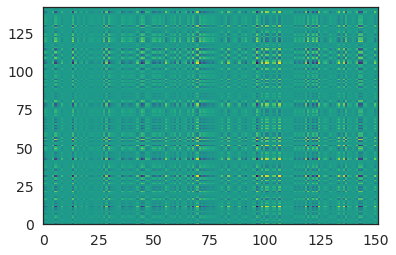

In [36]:
plt.figure();
plt.pcolormesh(recon_voxel.T)

In [ ]:
plt.figure();
plt.plot(recon_voxel[:,0:2])

In [98]:
from feature_extraction import sketch_token_features
from model_fitting import initialize_fitting
device = initialize_fitting.init_cuda()
_feature_extractor = sketch_token_feature_extractor(subject=subject, \
              device=device, use_pca_feats = False, use_lda_feats = False, 
                                          lda_discrim_type = None)
_feature_extractor.init_for_fitting(image_size=(224,224), models=models, dtype=np.float32)

#device: 1
device#: 0
device name: GeForce RTX 2080 Ti

torch: 1.8.1+cu111
cuda:  11.1
cudnn: 8005
dtype: torch.float32
Initializing for fitting
Clearing features from memory


In [18]:

aperture_rf_range = 1.1
aperture, models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range) 


most extreme RF positions:
[-0.55 -0.55  0.04]
[0.55       0.55       0.40000001]


In [100]:

all_feat_concat, feature_inds_defined = \
_feature_extractor(images, prf_models[mm,:], 0, fitting_mode=False)


Final size of feature matrix is:
(142, 151)


In [101]:
pred_models = np.tile(all_feat_concat[:,:,np.newaxis], [1,1, 875]);

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [99]:
n_trials = len(images)
n_features_max = 151
n_prfs = len(models)
prf_models = models
dtype = np.float32
pred_models = np.full(fill_value=0, shape=(n_trials, n_features_max, n_prfs), dtype=dtype)     
images = val_stim_data
all_feat_concat, feature_inds_defined = _feature_extractor(images, \
                                       models[mm,:], 0, fitting_mode=False)
for mm in range(n_prfs):
    print('Getting features for prf %d: [x,y,sigma] is [%.2f %.2f %.4f]'%(mm, prf_models[mm,0],  prf_models[mm,1],  prf_models[mm,2] ))

    all_feat_concat, feature_inds_defined = _feature_extractor(images, prf_models[mm,:], mm, fitting_mode=False)

    pred_models[:,:,mm] = torch_utils.get_value(all_feat_concat)
   

Loading pre-computed features from /user_data/mmhender/features/sketch_tokens/S1_features_each_prf.h5py
Took 1.69457 seconds to load file
Size of features array for this image set is:
(142, 151, 1)
Final size of feature matrix is:
(142, 151)
Getting features for prf 0: [x,y,sigma] is [-0.55 -0.55 0.0400]
Final size of feature matrix is:
(142, 151)
Getting features for prf 1: [x,y,sigma] is [-0.49 -0.55 0.0400]


IndexError: index 1 is out of bounds for axis 2 with size 1

In [39]:
all_feat_concat = all_feat_concat.detach().cpu().numpy()

In [46]:
import scipy.stats
all_feat_concat = scipy.stats.zscore(all_feat_concat, axis=0)

In [88]:
ssr = np.sum((recon_voxel.T - all_feat_concat)**2)
sst = np.sum((all_feat_concat-np.mean(all_feat_concat))**2)
R2_recon = 1-ssr/sst
R2_recon

-0.003232612847895666

In [93]:
from model_fitting import fwrf_predict
r2_each_trial = fwrf_predict.get_r2(all_feat_concat.T, recon_voxel)
r2_each_trial.shape

(142,)

In [94]:
np.mean(r2_each_trial)

-3.284403380195141

In [79]:
n_trials = all_feat_concat.shape[0]
rec_angles = np.zeros((n_trials,))
for tt in range(n_trials):
    rec = recon_pop[0:150,tt]
    actual = all_feat_concat[tt,0:150]
    dp = rec @ actual
    angle = np.arccos(dp / (np.sqrt(np.sum(rec**2)) * np.sqrt(np.sum(actual**2)))) * 180/np.pi
    rec_angles[tt] = angle

In [83]:
np.mean(rec_angles)

77.66587308250973

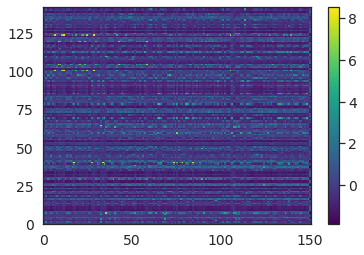

In [48]:
plt.figure();
plt.pcolormesh(all_feat_concat)
plt.colorbar()

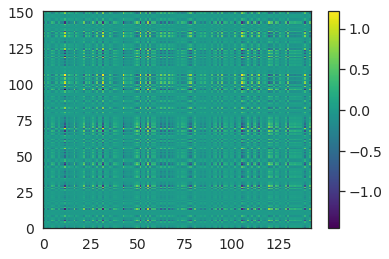

In [82]:
plt.figure();
plt.pcolormesh(recon_voxel)
plt.colorbar()

In [58]:
ssr = np.sum((recon_pop.T[:,0:150] - all_feat_concat[:,0:150])**2)
sst = np.sum((all_feat_concat[:,0:150]-np.mean(all_feat_concat[:,0:150]))**2)
R2_recon = 1-ssr/sst
R2_recon

-7.885818604287394

In [72]:
n_trials = all_feat_concat.shape[0]
rec_angles = np.zeros((n_trials,))
for tt in range(n_trials):
    rec = recon_pop[0:150,tt]
    actual = all_feat_concat[tt,0:150]
    dp = rec @ actual
    angle = np.arccos(dp / (np.sqrt(np.sum(rec**2)) * np.sqrt(np.sum(actual**2)))) * 180/np.pi
    rec_angles[tt] = angle

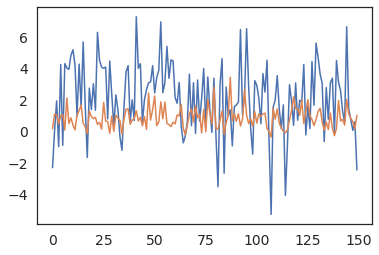

In [77]:
plt.figure();
plt.plot(rec)
plt.plot(actual)

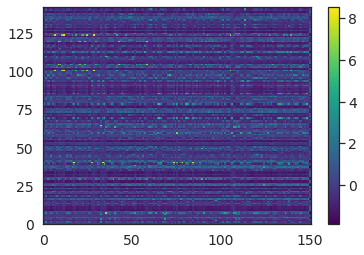

In [59]:
plt.figure();
plt.pcolormesh(all_feat_concat)
plt.colorbar()

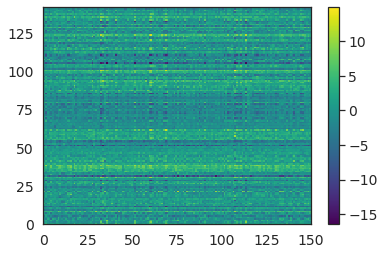

In [60]:
plt.figure();
plt.pcolormesh(recon_pop.T[:,0:150])
plt.colorbar()

In [43]:
ssr

747.0805081938776

In [42]:
sst

0.026635317

In [83]:
_feature_extractor.features_each_prf.shape

(1, 10000, 151, 875)

In [88]:
val_voxel_data

array([[-0.23748715, -0.40008146, -0.79332542, ...,  0.34429115,
        -0.89830232, -1.10369921],
       [ 0.60243589, -1.58122647, -1.05270433, ..., -0.63479602,
        -0.54893756,  0.38300744],
       [ 0.12001856,  1.59438574,  0.11450043, ...,  0.36619464,
         0.02145392,  0.90371978],
       ...,
       [-0.74144101, -0.78846562, -2.16133952, ...,  0.36838499,
         0.67205667,  1.00348234],
       [-1.60505426, -0.75191188,  0.40316397, ..., -2.50754666,
        -0.55072004, -0.62191862],
       [ 0.17816706, -0.23787393, -1.38738668, ...,  0.49323508,
        -1.12467647, -0.9674381 ]])

In [11]:
from plotting_and_analysis import analysis_utils
retlabs, catlabs, ret_group_names, categ_group_names = analysis_utils.get_combined_rois(subject, out1)

In [ ]:
#  voxel_roi = out['voxel_roi']
#  voxel_idx = out['voxel_index'][0]

assert(len(voxel_roi)==2)
[roi_labels_retino, roi_labels_categ] = copy.deepcopy(voxel_roi)
roi_labels_retino = roi_labels_retino[voxel_idx]
roi_labels_categ = roi_labels_categ[voxel_idx]

    ret, face, place = roi_utils.load_roi_label_mapping(subject, verbose=verbose)
    
    max_ret_label = np.max(ret[0])
    face[0] = face[0]+max_ret_label
    max_face_label = np.max(face[0])
    place[0] = place[0]+max_face_label
    if verbose:
        print(face)
        print(place)
        print(np.unique(roi_labels_categ))

    ret_group_names = roi_utils.ret_group_names
    ret_group_inds =  roi_utils.ret_group_inds
    n_rois_ret = len(ret_group_names)

    categ_group_names = list(np.concatenate((face[1], place[1])))
    categ_group_inds =  list(np.concatenate((face[0], place[0])))
    n_rois_categ = len(categ_group_names)

    n_rois = n_rois_ret + n_rois_categ
    

roi_labels_retino, roi_labels_categ, ret_group_inds, categ_group_inds, ret_group_names, categ_group_names, \
        n_rois_ret, n_rois_categ, n_rois = get_roi_info(subject, out)

    retlabs = np.zeros(np.shape(roi_labels_retino))
    catlabs = np.zeros(np.shape(roi_labels_retino))

    for rr in range(n_rois_ret):   
        inds_this_roi = np.isin(roi_labels_retino, ret_group_inds[rr])
        retlabs[inds_this_roi] = rr+1

    for rr in range(n_rois_categ):   
        inds_this_roi = np.isin(roi_labels_categ, categ_group_inds[rr])
        catlabs[inds_this_roi] = rr+1


In [51]:
np.unique(retlabs)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [52]:
ret_group_names

['V1',
 'V2',
 'V3',
 'hV4',
 'VO1-2',
 'PHC1-2',
 'LO1-2',
 'TO1-2',
 'V3ab',
 'IPS0-5',
 'SPL1',
 'FEF']

In [31]:
vv = 3
vinds = retlabs==vv
W = st_enc_wts[vinds,:]
# recon_pop = np.linalg.pinv(W) @ val_voxel_data[:,vinds].T
recon_pop = np.linalg.pinv(W[:,0:150]) @ val_voxel_data[:,vinds].T

In [16]:
W.shape

(1674, 151)

In [13]:
np.linalg.pinv(W).shape

(151, 1674)

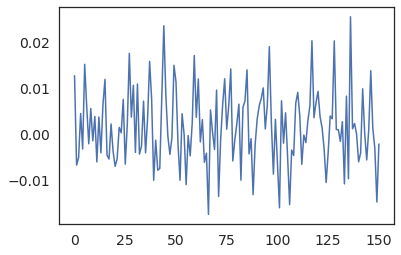

In [26]:
plt.figure();
plt.plot(np.mean(W, axis=0))

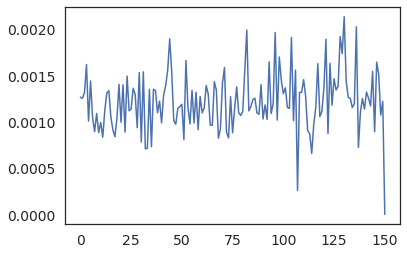

In [21]:
plt.figure();
plt.plot(np.var(W, axis=0))

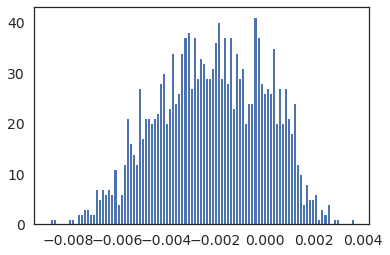

In [28]:
plt.figure();
plt.hist(W[:,150],100);

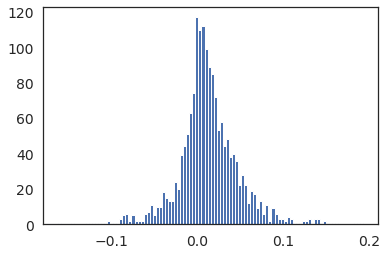

In [30]:
plt.figure();
plt.hist(W[:,0],100);

In [14]:
val_voxel_data[:,vinds].T.shape

(1674, 142)

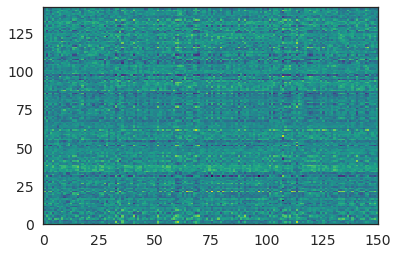

In [32]:
plt.figure();
plt.pcolormesh(recon_pop.T)

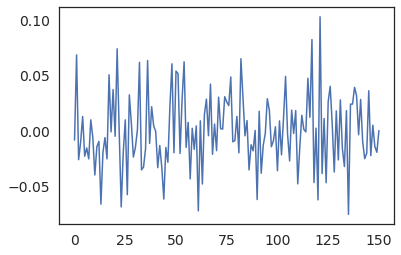

In [35]:
plt.figure();
plt.plot(W.T)

In [10]:
trn_stim_data = image_order_trn
val_stim_data = image_order_val


In [9]:
from utils import nsd_utils, roi_utils
# decide what voxels to use  
voxel_mask, voxel_index, voxel_roi, voxel_ncsnr, brain_nii_shape = \
    roi_utils.get_voxel_roi_info(subject, volume_space, include_all=True)
up_to_sess = 2
sessions = np.arange(0,up_to_sess)
zscore_betas_within_sess = True
# get all data and corresponding images, in two splits. always fixed set that gets left out
trn_stim_data, trn_voxel_data, val_stim_data, val_voxel_data, \
        image_order, image_order_trn, image_order_val = nsd_utils.get_data_splits(subject, \
                                  sessions=sessions, image_inds_only = True, \
                                  voxel_mask=voxel_mask, volume_space=volume_space, \
                                  zscore_betas_within_sess=zscore_betas_within_sess)


Volume space: ROI defs are located at: /lab_data/tarrlab/common/datasets/NSD/nsddata/ppdata/subj01/func1pt8mm/roi

3794 voxels of overlap between kastner and prf definitions, using prf defs
unique values in retino labels:
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25.]
0 voxels of overlap between face and place definitions, using place defs
unique values in categ labels:
[-1.  0. 26. 27. 28. 30. 31. 32. 33.]
1535 voxels are defined (differently) in both retinotopic areas and category areas
Including all voxels that are defined within nsdgeneral mask, in addition to roi labels.

18947 voxels are defined across all areas, and will be used for analysis

Loading numerical label/name mappings for all ROIs:
[1, 2, 3, 4, 5, 6, 7]
['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4', 'VO1', 'VO2

In [93]:
trn_stim_data

In [21]:
import numpy as np
import sys, os
import torch
import time
import h5py
import pandas as pd
import torch.nn as nn
from sklearn import decomposition

from utils import prf_utils, torch_utils, texture_utils, default_paths
sketch_token_feat_path = default_paths.sketch_token_feat_path

class sketch_token_feature_extractor(nn.Module):
    
    def __init__(self, subject, device,\
                 use_pca_feats = False, min_pct_var = 99, max_pc_to_retain = 100, \
                 use_lda_feats = False, lda_discrim_type = None):
        
        super(sketch_token_feature_extractor, self).__init__()
        
        self.subject = subject
        
        self.use_pca_feats = use_pca_feats
        self.use_lda_feats = use_lda_feats
        self.lda_discrim_type = lda_discrim_type
        
        if self.use_pca_feats:
            self.n_features = 151
            self.use_lda_feats = False # only allow one of these to be true
            self.features_file = os.path.join(sketch_token_feat_path, 'PCA', 'S%d_PCA.npy'%(subject))     
            self.min_pct_var = min_pct_var
            self.max_pc_to_retain = np.min([self.n_features, max_pc_to_retain])
        elif self.use_lda_feats:
            self.use_pca_feats = False
            self.min_pct_var = None
            self.max_pc_to_retain = None  
            if self.lda_discrim_type=='all_supcat':
                self.n_features = 11     
                self.features_file = os.path.join(sketch_token_feat_path, 'LDA', \
                                                  'S%d_LDA_all_supcat.npy'%(subject))  
            elif self.lda_discrim_type=='animacy' or self.lda_discrim_type=='indoor_outdoor' or \
                    self.lda_discrim_type=='animal' or self.lda_discrim_type=='vehicle' or \
                    self.lda_discrim_type=='food' or self.lda_discrim_type=='person':
                self.n_features = 1 
                self.features_file = os.path.join(sketch_token_feat_path, 'LDA', \
                                                  'S%d_LDA_%s.npy'%(subject, self.lda_discrim_type))     
            else:
                print(lda_discrim_type)
                raise ValueError('--lda_discrim_type was not recognized')
        else:
            self.n_features = 151
            self.features_file = os.path.join(sketch_token_feat_path, 'S%d_features_each_prf.h5py'%(subject))
            self.min_pct_var = None
            self.max_pc_to_retain = None  
            
        if not os.path.exists(self.features_file):
            raise RuntimeError('Looking at %s for precomputed features, not found.'%self.features_file)

        self.device = device
        self.do_varpart=False # only one set of features in this model for now, not doing variance partition
        self.features_each_prf = None
        
    def init_for_fitting(self, image_size, models, dtype):

        """
        Additional initialization operations.
        """
        
        print('Initializing for fitting')

        if self.use_pca_feats:
            self.max_features = self.max_pc_to_retain        
        else:
            self.max_features = self.n_features
       
        self.clear_big_features()
        
    def get_partial_versions(self):

        if not hasattr(self, 'max_features'):
            raise RuntimeError('need to run init_for_fitting first')
           
        partial_version_names = ['full_model']
        masks = np.ones([1,self.max_features])

        return masks, partial_version_names

    def load_precomputed_features(self, image_inds):
        
        print('Loading pre-computed features from %s'%self.features_file)
        t = time.time()
           
        if self.use_pca_feats:
            
            # loading pre-computed pca features, and deciding here how many features to include in model.
            pc_result = np.load(self.features_file, allow_pickle=True).item()
            scores_each_prf = pc_result['scores']
            ev_each_prf = pc_result['ev']
            n_pcs_avail = scores_each_prf[0].shape[1]
            n_feat_each_prf = [np.where(np.cumsum(ev)>self.min_pct_var)[0][0] \
                               if np.size(np.where(np.cumsum(ev)>self.min_pct_var))>0 \
                               else n_pcs_avail for ev in ev_each_prf]
            n_feat_each_prf = [np.min([nf, self.max_pc_to_retain]) for nf in n_feat_each_prf]
            self.features_each_prf = [scores_each_prf[mm][image_inds,0:n_feat_each_prf[mm]] \
                                      for mm in range(len(scores_each_prf))]           
            print('Size of features array for first prf model with this image set is:')
            print(self.features_each_prf[0].shape)

        elif self.use_lda_feats:
            
            # loading pre-computed linear discriminant analysis features
            lda_result = np.load(self.features_file, allow_pickle=True).item()
            scores_each_prf = lda_result['scores']

            self.features_each_prf = np.moveaxis(np.array([scores_each_prf[mm][image_inds,:] \
                          for mm in range(len(scores_each_prf))]), [0,1,2], [2,0,1])
            assert(self.features_each_prf.shape[1]==self.max_features)
            print('Size of features array for this image set is:')
            print(self.features_each_prf.shape)
        
        else:
            
            # Loading raw sketch tokens features.
            with h5py.File(self.features_file, 'r') as data_set:
                values = np.copy(data_set['/features'][:,:,591:592])
                data_set.close() 
            elapsed = time.time() - t
            print('Took %.5f seconds to load file'%elapsed)

            self.features_each_prf = values[image_inds,:,:]
        
            print('Size of features array for this image set is:')
            print(self.features_each_prf.shape)
        
    def clear_big_features(self):
        
        print('Clearing features from memory')
        self.features_each_prf = None 
    
    def forward(self, image_inds, prf_params, prf_model_index, fitting_mode = True):
        
        if self.features_each_prf is None:
            self.load_precomputed_features(image_inds)
        
        if self.use_pca_feats:
            features = self.features_each_prf[prf_model_index]
        else:
            features = self.features_each_prf[:,:,prf_model_index]
        
        assert(features.shape[0]==len(image_inds))
        print('Final size of feature matrix is:')
        print(features.shape)
        
        features = torch_utils._to_torch(features, self.device)
        
        feature_inds_defined = np.zeros((self.max_features,), dtype=bool)
        feature_inds_defined[0:features.shape[1]] = 1
            
        return features, feature_inds_defined
     